# WDA - Certification project

## Introduction into the data

* [Kickstarter](https://www.kickstarter.com/) is a funding platform for creative projects.
* How it works:
 1. As a registered user - you can publish your Project = an idea what product you want to build for people - everything from films, games, and music to art, design, and technology.
 1. You set clear financial goal = how much money you need to build the product.
 1. People, who like your project, can send you money - an in exchange they receive the product after successful raise of money.
   * (these people are called 'backers')
 1. If project does not raise enough money -> it is cancelled and money are returned back to the backers.
 1. If project raises enough money - Kickstarter sends the collected money to the owners of the Project -> they use them to build their product.
 1. After product is built / manufactured -> the products are sent and delivered to the backers.

### Dataset

Dataset describes all Kickstarter Projects until DEC 2016.
* **each row** contains one Project
* **each column** describes some attributes of the Project

### Description of all columns

* **ID**: unique ID of the project
* **name**: project name
* **category**: custom category of the project
* **main_category**: official categories of the projects
* **currency**: in which currency the money is pledged (=collected, raised)
* **deadline**: last date/time, until when money is collected
* **goal**: money target - how much money the project needs to pledge (collect), so it can start a production
* **launched**: starting date/time of the project
* **pledged**: amount of pledged (collected) money
* **state**: state of the project
* **backers**: count of backers (people, that funded project)
* **country**: country of the project
* **'usd pledged'**: amount pledged - but converted to USD currency

### How easy or hard is this certification?
* Many questions are short one-liners = they are quite easy and take little time 
* All tasks are relatively simple and they never take more than max 3-4 lines of code
* There are no catchy things or very complex tasks.

### How much time do you have to deliver solutions?
* Expected time to finish is 3-4 hours.
  * but everybody has up to **12 hours** to deliver solutions, so you can stay calm and easy
* Example:
  * If you receive certification at 8:30, the latest time for delivering solutions is 20:30.

### How to deliver solutions? 
Please send your solution (filled python notebook) to stefan.simik@gmail.com


Good luck and happy coding!

# Tasks and questions

In [221]:
import numpy as np
import pandas as pd
import plotly.express as px

In [222]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

## Load data and show preview of some rows

* Load the data from CSV file:
  * `kickstarter.csv`
* Note: 
  * After loading the data, you will find 4 empty columns called like 'Unnamed XX'.
    * This is OK, because they exist also in the CSV file. We'll get rid of them later.

In [223]:
# Write code here
df_kickstarter = pd.read_csv('kickstarter.csv', sep = ',', low_memory=False)
df_kickstarter.head()

ID                                               name   \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

        category  main_category  currency             deadline   goal   \
0          Poetry     Publishing       GBP  2015-10-09 11:36:00   1000   
1  Narrative Film   Film & Video       USD  2013-02-26 00:20:50  45000   
2           Music          Music       USD  2012-04-16 04:24:11   5000   
3    Film & Video   Film & Video       USD  2015-08-29 01:00:00  19500   
4     Restaurants           Food       USD  2016-04-01 13:38:27  50000   

             launched  pledged       state  backers  country  usd pledged   \
0  2015-08-11 12:12:28        0      failed        0       GB            0   
1  2013-01-12 00:20:50      220      failed        3       US          220   
2  2012-03-17 03:24:11        1      failed        1       US            1   
3  2015-07-04 08:35:03     1283    canceled       14       US         1283   
4  2016-02-26 13:38:27    52375  successful      224       US        52375   

  Unnamed: 13 Unnamed: 14  Unnamed: 15  Unnamed: 16  
0         NaN         NaN          NaN          NaN  
1         NaN         NaN          NaN          NaN  
2         NaN         NaN          NaN          NaN  
3         NaN         NaN          NaN          NaN  
4         NaN         NaN          NaN          NaN

In [224]:
print(df_kickstarter.shape)

(323749, 17)



## Basics about data


### Question: How many Kickstarter projects are in the data?

* You can translate the question as: How many rows are in the data?

In [225]:
# Write code here
len(df_kickstarter.index)

323749

### Question: How many columns are in the input data?

* (Yes, including those last 4 empty columns

In [226]:
# Write code here
len(df_kickstarter.columns)

17

### Task: Show names of all columns

In [227]:
# Write code here
df_kickstarter.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

## Working with strings

### Task: Fix columns names

When you look at the column names (from previous task), you can see, 
they are not clean, because they contain one additional `space` at the end.<br/>

Let's fix it and ensure, each column-name is clean = without that `last space` at the end.

**Hint:** In case you have no idea - search google using keywords: `pandas dataframe remove space from column name`

In [228]:
# Write code here
df_kickstarter.columns = df_kickstarter.columns.str.replace(' ', '')
df_kickstarter.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

         category main_category currency             deadline   goal  \
0          Poetry    Publishing      GBP  2015-10-09 11:36:00   1000   
1  Narrative Film  Film & Video      USD  2013-02-26 00:20:50  45000   
2           Music         Music      USD  2012-04-16 04:24:11   5000   
3    Film & Video  Film & Video      USD  2015-08-29 01:00:00  19500   
4     Restaurants          Food      USD  2016-04-01 13:38:27  50000   

              launched pledged       state backers country usdpledged  \
0  2015-08-11 12:12:28       0      failed       0      GB          0   
1  2013-01-12 00:20:50     220      failed       3      US        220   
2  2012-03-17 03:24:11       1      failed       1      US          1   
3  2015-07-04 08:35:03    1283    canceled      14      US       1283   
4  2016-02-26 13:38:27   52375  successful     224      US      52375   

  Unnamed:13 Unnamed:14  Unnamed:15  Unnamed:16  
0        NaN        NaN         NaN         NaN  
1        NaN        NaN         NaN         NaN  
2        NaN        NaN         NaN         NaN  
3        NaN        NaN         NaN         NaN  
4        NaN        NaN         NaN         NaN

In [229]:
df_kickstarter.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usdpledged', 'Unnamed:13', 'Unnamed:14', 'Unnamed:15', 'Unnamed:16'],
      dtype='object')

## Dataframe transformations

### Task: Remove 4 last columns

Remove last 4 columns called like `Unnamed XX`,<br/>so we can work with cleaner DataFrame for next tasks.

In [230]:
# Write code here
df_kickstarter.drop((['Unnamed:13','Unnamed:14', 'Unnamed:15', 'Unnamed:16']), axis=1, inplace=True)
df_kickstarter.head()
# df = df.drop(df.columns[[0, 1, 3]], axis=1) df = df.drop('column_name', axis=1)

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

         category main_category currency             deadline   goal  \
0          Poetry    Publishing      GBP  2015-10-09 11:36:00   1000   
1  Narrative Film  Film & Video      USD  2013-02-26 00:20:50  45000   
2           Music         Music      USD  2012-04-16 04:24:11   5000   
3    Film & Video  Film & Video      USD  2015-08-29 01:00:00  19500   
4     Restaurants          Food      USD  2016-04-01 13:38:27  50000   

              launched pledged       state backers country usdpledged  
0  2015-08-11 12:12:28       0      failed       0      GB          0  
1  2013-01-12 00:20:50     220      failed       3      US        220  
2  2012-03-17 03:24:11       1      failed       1      US          1  
3  2015-07-04 08:35:03    1283    canceled      14      US       1283  
4  2016-02-26 13:38:27   52375  successful     224      US      52375

### Task: Reorder columns

We are not satisfied with how the columns are ordered in DataFrame<br/>
and we would prefer to see columns in different order - so that related columns are together.

* This is expected columns order:
  * `'ID', 'name', 'main_category', 'category', 'launched', 'deadline', 'goal', 'pledged', 'currency', 'usd pledged', 'backers', 'state', 'country'`

In [231]:
# Write code here
df_kickstarter = df_kickstarter.reindex(['ID', 'name', 'main_category', 'category', 'launched', 'deadline', 'goal', 'pledged', 'currency', 'usd pledged', 'backers', 'state', 'country'], axis=1)
df_kickstarter.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

  main_category        category             launched             deadline  \
0    Publishing          Poetry  2015-08-11 12:12:28  2015-10-09 11:36:00   
1  Film & Video  Narrative Film  2013-01-12 00:20:50  2013-02-26 00:20:50   
2         Music           Music  2012-03-17 03:24:11  2012-04-16 04:24:11   
3  Film & Video    Film & Video  2015-07-04 08:35:03  2015-08-29 01:00:00   
4          Food     Restaurants  2016-02-26 13:38:27  2016-04-01 13:38:27   

    goal pledged currency  usd pledged backers       state country  
0   1000       0      GBP          NaN       0      failed      GB  
1  45000     220      USD          NaN       3      failed      US  
2   5000       1      USD          NaN       1      failed      US  
3  19500    1283      USD          NaN      14    canceled      US  
4  50000   52375      USD          NaN     224  successful      US

## Working with online documentation

### Task: convert 'deadline' and 'launched' columns to datetime

There are 2 columns `deadline` a `launched`, that need to be converted to datetime.
* `launched` - represents date, when Kickstarter project officially started its funding.
* `deadline` -represents date, when Kickstarter project officially ends its funding.

Notes:
* both columns `deadline` a `launched` may contain invalid values
  * all invalid values can be converted to missing values

Hint:
* Function **`pd.to_datetime(...)`** has parameter **`errors`** to automatically handle invalid values

In [232]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323749 entries, 0 to 323748
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             323749 non-null  int64  
 1   name           323745 non-null  object 
 2   main_category  323749 non-null  object 
 3   category       323744 non-null  object 
 4   launched       323749 non-null  object 
 5   deadline       323749 non-null  object 
 6   goal           323749 non-null  object 
 7   pledged        323749 non-null  object 
 8   currency       323749 non-null  object 
 9   usd pledged    0 non-null       float64
 10  backers        323749 non-null  object 
 11  state          323749 non-null  object 
 12  country        319328 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 32.1+ MB


In [233]:
# Write code here
df_kickstarter = (
    df_kickstarter.
    assign(launched = lambda df: pd.to_datetime(df['launched'], errors = 'coerce'),
           deadline = lambda df: pd.to_datetime(df['deadline'], errors = 'coerce')
    )
)
df_kickstarter.sample(5)

ID                                               name  \
244454   523098283                                Mobbin Wear is Here   
223179   396368391                               Platforms and Trains   
274610   704484398  Rome to Auschwitz Tour with Altamura Competiti...   
181927  2083678620  Argyle & Crew - Soppet Adventures! The sock pu...   
250581   560424855  Antiquities and Tangibles: A Short Fiction Col...   

       main_category         category            launched            deadline  \
244454       Fashion          Fashion 2012-07-27 21:52:25 2012-08-26 21:52:25   
223179         Dance            Dance 2013-12-31 21:00:51 2014-01-30 21:00:24   
274610         Music  Classical Music 2015-07-20 16:31:18 2015-08-29 16:31:18   
181927         Games   Tabletop Games 2011-07-21 13:51:55 2011-08-27 05:59:00   
250581    Publishing          Fiction 2012-07-30 18:17:38 2012-08-29 18:17:38   

         goal  pledged currency  usd pledged backers       state country  
244454   4000     1010      USD          NaN       9      failed      US  
223179    250      260      CAD          NaN      14  successful      CA  
274610  30000      335      USD          NaN       5      failed      US  
181927   3000     1675      USD          NaN      65      failed      US  
250581   2000  8848.02      USD          NaN     273  successful      US

In [234]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323749 entries, 0 to 323748
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             323749 non-null  int64         
 1   name           323745 non-null  object        
 2   main_category  323749 non-null  object        
 3   category       323744 non-null  object        
 4   launched       323169 non-null  datetime64[ns]
 5   deadline       323118 non-null  datetime64[ns]
 6   goal           323749 non-null  object        
 7   pledged        323749 non-null  object        
 8   currency       323749 non-null  object        
 9   usd pledged    0 non-null       float64       
 10  backers        323749 non-null  object        
 11  state          323749 non-null  object        
 12  country        319328 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 32.1+ MB


## Working with Datetimes

### Create new column 'duration_days'
* Create new column **`duration_days`** - it should contain how many **days** it took from `launched` -> `deadline`, because we want to see, how long (how many days) each project took.
* *(Length of standard solution is ~ 1-2 lines)*

In [235]:
# Write code here
df_kickstarter = (
    df_kickstarter.
    assign(duration_days = lambda df: (df['deadline'] - df['launched']).dt.total_seconds()// 86400)
)
df_kickstarter.sample(5)

ID                                               name  \
88748   1527525177                                 Caribbean Cookbook   
194668   226461423                     Dreams Start Here Clothing Co.   
26534   1157330859                MUST SEE - Last Push:THE 2015 ALBUM   
136995  1813618726  Brain Food: A Design for Good Product by AIGA ...   
315062   947455559             Milkweed for Monarchs Butterfly Garden   

       main_category category            launched            deadline  goal  \
88748           Food     Food 2012-02-22 22:02:58 2012-03-18 21:02:58  8000   
194668       Fashion  Apparel 2016-09-27 02:46:09 2016-10-27 02:46:09  2000   
26534          Music  Hip-Hop 2015-01-23 20:53:12 2015-02-22 20:53:12  7200   
136995        Design   Design 2013-10-02 22:14:04 2013-11-07 22:45:00  7800   
315062          Food     Food 2012-09-11 08:43:52 2012-10-11 08:43:52  8000   

       pledged currency  usd pledged backers       state country  \
88748        0      USD          NaN       0      failed      US   
194668      36      USD          NaN       2      failed      US   
26534        1      USD          NaN       1      failed      US   
136995    7910      USD          NaN     179  successful      US   
315062    8013      USD          NaN      82  successful      US   

        duration_days  
88748            24.0  
194668           30.0  
26534            30.0  
136995           36.0  
315062           30.0

### Task: Show row with project, that took longest time.

Said differently - Show row where column **`duration_days`** has largest value.

In [236]:
# Write code here
longest_time = df_kickstarter['duration_days'].max()
df_kickstarter.query('duration_days == @longest_time')

ID                          name main_category    category  \
272948  69489148  Student Auditions Music 2015    Publishing  Publishing   

                  launched            deadline  goal pledged currency  \
272948 1970-01-01 01:00:00 2015-10-31 09:17:00  1900       0      CHF   

        usd pledged backers      state country  duration_days  
272948          NaN       0  suspended      CH        16739.0

### Task: Show row with project, that took longest time - but only from successful projects

This task is very similar as previous one - just extended with one condition.
* We want to see project(s), with longest `duration_days` (same as previous)
* but only from sucessful projects - i.e. where column `state == "successful"`

**Hint:** you can expect, you can find more more projects with same longest time, not only one

In [237]:
# Write code here
df = (df_kickstarter.query('state == "successful" '))
longest_time_only_successful = df['duration_days'].max()
df.query('duration_days == @longest_time_only_successful')

ID                                               name  \
73322   1435845569  CanStar LLC Kickstarts Fundraising for 'Vincen...   
75344    144788399  Traditions Build Winners as the Snipe Class tu...   
128629  1763767465  Misisipi Mike Wolf's 2nd Album - Enjoy Irrespo...   
208310   307797738                          Angie McClure's new album   

       main_category        category            launched            deadline  \
73322        Theater         Theater 2010-12-31 18:12:36 2011-04-02 18:12:36   
75344   Film & Video     Documentary 2010-12-29 23:22:08 2011-03-31 23:22:08   
128629         Music  Country & Folk 2010-12-31 10:05:54 2011-04-02 10:05:54   
208310         Music      Indie Rock 2011-01-02 07:39:52 2011-04-04 07:39:52   

        goal pledged currency  usd pledged backers       state country  \
73322   7000    7358      USD          NaN      93  successful      US   
75344   7500    7625      USD          NaN      56  successful      US   
128629  1500    1710      USD          NaN      31  successful      US   
208310  5000    5275      USD          NaN      63  successful      US   

        duration_days  
73322            92.0  
75344            92.0  
128629           92.0  
208310           92.0

## Frequency of data

### Question: What is the most frequent project name?
You can see, that many Kickstarter projects have the same name. What is the most frequently used name?

**Note**: Name of Kickstarter project is in column `name`

In [238]:
# Write code here
df_kickstarter['name'].value_counts().idxmax()

'New EP/Music Development'

### Question: The most frequent project name - How many times is it repeated in the data?

* In previous task, we found out, **which name** of the project is used most frequently.
* In this task, we want to know, **how frequently** that name is used = How many observations of the name re in the data?

In [239]:
# Write code here
df_kickstarter['name'].value_counts().iloc[0]

41

### Question: What is the most frequent value in column `main_category`?
* *(Length of standard solution is ~ 1 line)*

In [240]:
# Write code here
df_kickstarter['main_category'].value_counts().idxmax()

'Film & Video'

## Unique values

### Question: Show all unique values in column `main_category`

In [241]:
# Write code here
df_kickstarter['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', 'Metal', 'Cookbooks', 'Web',
       'Shorts', 'Plays', 'Hardware', 'Playing Cards', 'World Music',
       'Mobile Games', 'Camera Equipment', 'Classical Music',
       'Conceptual Art', 'Nonfiction', 'Product Design', 'Documentary',
       'Video Games', ' 50 Years in the Making', 'Country & Folk',
       'Mixed Media', 'Comic Books', ' Retro Gaming art.', 'Places',
       'Events', 'Fiction', 'Tabletop Games', 'Video', 'Performance Art',
       'Small Batch', "Children's Books", 'Poetry', 'Public Art',
       'Art Books', 'Drama', 'Apparel', 'Sculpture', 'DIY', 'Hip-Hop',
       'Accessories', 'People', 'Webseries', 'Interactive Design',
       'Periodicals', 'Vegan', 'Indie Rock', 'Academic', 'Pop',
       ' M.ercury E.dition)', 'Faith', 'Jazz', 'Space Exploration',
       'Performances', 'Digital A

### Question: How many unique values are in column `category`?

* Note: Despite similar names, here we ask about different column, than in the previous task.

In [242]:
# Write code here
df_kickstarter['main_category'].nunique()

119

## Fix invalid values

### Task: Convert columns `goal` and `pledged` into decimal numbers

Info about data:
* `goal` - represents target amount of value, that needs to be collected. If this goal is not met, project fails and cannot start or be realized.
* `pledged` represents amount of money, which was collected from people (so called 'backers')

Currently, both columns are strings, because they contain error data = simply invalid values, which are not numbers.

**Main goal:** convert both columns 'goal' and 'pledged' into numerical type float
  * You can use common function: `pd.to_numeric` to achieve this goal

In [243]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323749 entries, 0 to 323748
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             323749 non-null  int64         
 1   name           323745 non-null  object        
 2   main_category  323749 non-null  object        
 3   category       323744 non-null  object        
 4   launched       323169 non-null  datetime64[ns]
 5   deadline       323118 non-null  datetime64[ns]
 6   goal           323749 non-null  object        
 7   pledged        323749 non-null  object        
 8   currency       323749 non-null  object        
 9   usd pledged    0 non-null       float64       
 10  backers        323749 non-null  object        
 11  state          323749 non-null  object        
 12  country        319328 non-null  object        
 13  duration_days  323118 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(9

In [244]:
# Write code here
df_kickstarter = (
    df_kickstarter.
    assign(goal = lambda df: pd.to_numeric(df['goal'], errors = 'coerce'),
           pledged = lambda df: pd.to_numeric(df['pledged'], errors = 'coerce')
    )
)
df_kickstarter.sample(5)

ID                                               name  \
153330  191131574  Mukashi - Scrolls of Hope, an adventure game f...   
115275  168402476            Bend Over: The Hollywood Survival Guide   
200721  262341019                                   Optimistic Chaos   
240433  499336090                                  Find The Warhols!   
235968  473321029     CHURCH FOREST: The Green Necklaces of Ethiopia   

       main_category      category            launched            deadline  \
153330         Games   Video Games 2014-07-10 03:02:37 2014-08-08 16:30:00   
115275  Film & Video  Film & Video 2011-04-23 05:40:40 2011-06-22 05:40:40   
200721  Film & Video   Documentary 2012-10-03 16:02:43 2012-11-02 15:02:43   
240433           Art      Painting 2009-09-21 18:47:14 2009-10-26 16:16:00   
235968  Film & Video   Documentary 2011-09-12 14:12:24 2011-11-11 14:12:24   

           goal  pledged currency  usd pledged backers       state country  \
153330   8000.0    126.0      GBP          NaN      15      failed      GB   
115275   6500.0    375.0      USD          NaN       9      failed      US   
200721  10000.0    802.0      USD          NaN      14      failed      US   
240433   1410.0    260.0      USD          NaN      15      failed      US   
235968  25000.0  25115.0      USD          NaN     105  successful      US   

        duration_days  
153330           29.0  
115275           60.0  
200721           29.0  
240433           34.0  
235968           60.0

In [245]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323749 entries, 0 to 323748
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             323749 non-null  int64         
 1   name           323745 non-null  object        
 2   main_category  323749 non-null  object        
 3   category       323744 non-null  object        
 4   launched       323169 non-null  datetime64[ns]
 5   deadline       323118 non-null  datetime64[ns]
 6   goal           323118 non-null  float64       
 7   pledged        323126 non-null  float64       
 8   currency       323749 non-null  object        
 9   usd pledged    0 non-null       float64       
 10  backers        323749 non-null  object        
 11  state          323749 non-null  object        
 12  country        319328 non-null  object        
 13  duration_days  323118 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(7

## Check missing values

Before answering many questions below, it is required to have solved 2 previous tasks, which converted columns 'pledged' and 'goal' into decimal numbers...

### How many missing values are in column `goal` ?

In [246]:
# Write code here
df_kickstarter['goal'].isnull().sum()

631

### How many existing (=not missing) values are in column `goal` ?

In [31]:
# Write code here
df_kickstarter['goal'].notnull().sum()

323118

## Min / Max / Median / Quantile values

### Question: What is the highest pledged amount?

In [247]:
# Write code here
df_kickstarter['pledged'].max()

20338986.27

### Task: Print the whole row, with highest pledged amount

In [248]:
# Write code here
# max_pl = (df_kickstarter['pledged'] == df_kickstarter['pledged'].max())
# df_kickstarter[max_pl]
df_kickstarter[df_kickstarter['pledged'] == df_kickstarter['pledged'].max()]


ID                                              name  \
134619  1799979574  Pebble Time - Awesome Smartwatch, No Compromises   

       main_category        category            launched            deadline  \
134619        Design  Product Design 2015-02-24 15:44:42 2015-03-28 03:00:00   

            goal      pledged currency  usd pledged backers       state  \
134619  500000.0  20338986.27      USD          NaN   78471  successful   

       country  duration_days  
134619      US           31.0

### Question: What is the largest value in column `goal`?

In [249]:
# Write code here
df_kickstarter['goal'].max()

100000000.0

### Question: What is median value in column `pledged`?

In [250]:
# Write code here
df_kickstarter['pledged'].median()

610.0

### Question: What is the value of 75-th percentile in column `pledged`?

In [251]:
# Write code here
df_kickstarter['pledged'].quantile(0.75)

3938.54

### Question: What is the earliest datetime = when first project started?

Said differently: What is the earliest datetime in 'launched' column?

In [252]:
# Write code here
df_kickstarter['launched'].min()

Timestamp('1700-01-01 00:00:00')

### Question: What is the last datetime, when project was started?

In [253]:
# Write code here
df_kickstarter['launched'].max()

Timestamp('2250-01-01 00:00:00')

### Free text question: Does the dataset contain technically valid, but probably incorrect datetimes?

* If yes, simply answer in your own words, what you have found out.

In [ ]:
# Write code here 
# najskorsi zaciatok projektu v r 1700
# zaciatok projektu je az v buducnosti
# prilis dlhe trvanie 16739 dni

## Pivot tables

### Task: Show simple pivot table

where you display **count of projects** by:
* each **country** (in rows)
* each **state** (in columns)

In [254]:
df_kickstarter.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

  main_category        category            launched            deadline  \
0    Publishing          Poetry 2015-08-11 12:12:28 2015-10-09 11:36:00   
1  Film & Video  Narrative Film 2013-01-12 00:20:50 2013-02-26 00:20:50   
2         Music           Music 2012-03-17 03:24:11 2012-04-16 04:24:11   
3  Film & Video    Film & Video 2015-07-04 08:35:03 2015-08-29 01:00:00   
4          Food     Restaurants 2016-02-26 13:38:27 2016-04-01 13:38:27   

      goal  pledged currency  usd pledged backers       state country  \
0   1000.0      0.0      GBP          NaN       0      failed      GB   
1  45000.0    220.0      USD          NaN       3      failed      US   
2   5000.0      1.0      USD          NaN       1      failed      US   
3  19500.0   1283.0      USD          NaN      14    canceled      US   
4  50000.0  52375.0      USD          NaN     224  successful      US   

   duration_days  
0           58.0  
1           45.0  
2           30.0  
3           55.0  
4           35.0

In [255]:
# Write code here
df = (
    df_kickstarter
    .pivot_table(index = 'country', columns = 'state', aggfunc = {'ID':'count'})
    .droplevel(0, axis = 'columns')
)
df

state    canceled    failed    live  successful  suspended
country                                                   
AT           64.0     223.0    26.0        60.0        4.0
AU          855.0    3733.0   124.0      1450.0       74.0
BE           50.0     250.0    18.0        79.0        5.0
CA         1762.0    6832.0   233.0      3067.0       98.0
CH           45.0     303.0    29.0        86.0        8.0
DE          405.0    1600.0   117.0       530.0       32.0
DK          113.0     441.0    31.0       231.0        9.0
ES          191.0     847.0    84.0       242.0        8.0
FR          237.0    1045.0   106.0       512.0       10.0
GB         3112.0   14480.0   431.0      9340.0      146.0
HK           15.0      33.0    32.0        14.0        3.0
IE           77.0     339.0    19.0       133.0        7.0
IT          233.0    1162.0   107.0       232.0       16.0
LU            2.0      20.0     5.0        13.0        NaN
MX           12.0       2.0   198.0         2.0        NaN
NL          322.0    1459.0    47.0       410.0       21.0
NO           75.0     322.0    16.0       108.0        5.0
NZ          115.0     662.0    18.0       330.0       11.0
SE          149.0     730.0    40.0       335.0       15.0
SG           10.0      37.0    38.0        32.0        2.0
US        24488.0  133596.0  2708.0     95770.0     1003.0

### Task: Show more complex pivot table

* For each **country** (in rows)
* Display these values (in columns)
  * min / average / max for **pledged** column
  * min / average / max for **goal** columns
  * count of projects

In [256]:
df2 = (
    df_kickstarter
    .pivot_table(
        index = 'country', aggfunc = {'pledged': ['min','mean', 'max'],
                                      'goal': ['min','mean', 'max'],
                                      'ID':'count'}     
    )
    
)

df2

ID         goal                             pledged  \
          count          max           mean     min          max   
country                                                            
AT          377    1500000.0   38509.753316   10.00    471748.00   
AU         6236  100000000.0   82093.709910    1.00   1479231.17   
BE          402    1500000.0   38381.221393    1.00    600514.00   
CA        11992  100000000.0   58444.585057    1.00   3257695.25   
CH          471  100000000.0  292952.307856   20.00    530792.00   
DE         2684   10000000.0   50682.122951    1.00    942673.07   
DK          825  100000000.0  280602.950303    5.00   3193364.00   
ES         1372   15000000.0   61182.582362    1.00    474530.21   
FR         1910  100000000.0   88794.978010    1.00   1618869.12   
GB        27509  100000000.0   30915.708423    1.00   3771474.81   
HK           97    6000000.0  226759.360825   10.00   1035290.00   
IE          575   10000000.0   53290.805217   15.00    219543.00   
IT         1750   40000000.0   72126.809143    1.00    926960.00   
LU           40     138962.0   20644.850000  100.00     76587.00   
MX          214    3000000.0  185632.196262   10.00    292535.00   
NL         2259   80000000.0  112338.026118    1.00   2053056.00   
NO          526  100000000.0  488118.606464    5.00   2923611.06   
NZ         1136   10000000.0   35859.557218    1.00    324462.52   
SE         1269   42900000.0  318035.806147   10.00   4961032.74   
SG          119     500000.0   27834.294118    5.00    281279.00   
US       257565  100000000.0   43427.762041    0.01  20338986.27   

                            
                 mean  min  
country                     
AT        9952.875915  0.0  
AU        6539.322473  0.0  
BE        6101.848632  0.0  
CA        7343.379632  0.0  
CH       11296.098238  0.0  
DE        7841.622414  0.0  
DK       39867.797430  0.0  
ES        4287.385007  0.0  
FR       10338.749995  0.0  
GB        4451.430196  0.0  
HK       71812.480722  0.0  
IE        4303.505043  0.0  
IT        4546.475686  0.0  
LU        3498.767500  0.0  
MX       18214.613972  0.0  
NL        6075.453603  0.0  
NO       27384.302471  0.0  
NZ        6043.600370  0.0  
SE       47688.887967  0.0  
SG       13367.732101  0.0  
US        9076.100807  0.0

### Task: Set user-friendly column names to previous result

Result of previous pivot-table may contain multi-index columns,<br/>
which can be complex and not easily readable. Let's fix it.<br/>
  
Make column-names simpler and more user-friendly, i.e.:
* only simple column names (no multi-index)
* set simple, intuitive and user-friendy names to each column
  * (something like: 'count_projects', 'max_goal', ...)

In [257]:
# Write code here
df2.columns = ["_".join((x,y)) for x,y in df2.columns]
df2.rename(columns = {'ID_count': 'cout_of_projects'})

cout_of_projects     goal_max      goal_mean  goal_min  pledged_max  \
country                                                                        
AT                    377    1500000.0   38509.753316     10.00    471748.00   
AU                   6236  100000000.0   82093.709910      1.00   1479231.17   
BE                    402    1500000.0   38381.221393      1.00    600514.00   
CA                  11992  100000000.0   58444.585057      1.00   3257695.25   
CH                    471  100000000.0  292952.307856     20.00    530792.00   
DE                   2684   10000000.0   50682.122951      1.00    942673.07   
DK                    825  100000000.0  280602.950303      5.00   3193364.00   
ES                   1372   15000000.0   61182.582362      1.00    474530.21   
FR                   1910  100000000.0   88794.978010      1.00   1618869.12   
GB                  27509  100000000.0   30915.708423      1.00   3771474.81   
HK                     97    6000000.0  226759.360825     10.00   1035290.00   
IE                    575   10000000.0   53290.805217     15.00    219543.00   
IT                   1750   40000000.0   72126.809143      1.00    926960.00   
LU                     40     138962.0   20644.850000    100.00     76587.00   
MX                    214    3000000.0  185632.196262     10.00    292535.00   
NL                   2259   80000000.0  112338.026118      1.00   2053056.00   
NO                    526  100000000.0  488118.606464      5.00   2923611.06   
NZ                   1136   10000000.0   35859.557218      1.00    324462.52   
SE                   1269   42900000.0  318035.806147     10.00   4961032.74   
SG                    119     500000.0   27834.294118      5.00    281279.00   
US                 257565  100000000.0   43427.762041      0.01  20338986.27   

         pledged_mean  pledged_min  
country                             
AT        9952.875915          0.0  
AU        6539.322473          0.0  
BE        6101.848632          0.0  
CA        7343.379632          0.0  
CH       11296.098238          0.0  
DE        7841.622414          0.0  
DK       39867.797430          0.0  
ES        4287.385007          0.0  
FR       10338.749995          0.0  
GB        4451.430196          0.0  
HK       71812.480722          0.0  
IE        4303.505043          0.0  
IT        4546.475686          0.0  
LU        3498.767500          0.0  
MX       18214.613972          0.0  
NL        6075.453603          0.0  
NO       27384.302471          0.0  
NZ        6043.600370          0.0  
SE       47688.887967          0.0  
SG       13367.732101          0.0  
US        9076.100807          0.0

## Group by

### Show average funding `goal` per each `country`

In [258]:
# Write code here
df3 = (
    df_kickstarter
    .groupby('country')
    .agg(average_goal = ('goal','mean'))
)
df3

average_goal
country               
AT        38509.753316
AU        82093.709910
BE        38381.221393
CA        58444.585057
CH       292952.307856
DE        50682.122951
DK       280602.950303
ES        61182.582362
FR        88794.978010
GB        30915.708423
HK       226759.360825
IE        53290.805217
IT        72126.809143
LU        20644.850000
MX       185632.196262
NL       112338.026118
NO       488118.606464
NZ        35859.557218
SE       318035.806147
SG        27834.294118
US        43427.762041

In [34]:
# Write code here

### What is the count of projects for each `state`

Column `state` contains status of the project.<br/>
We want to see, how many projects in each status we have.

In [259]:
# Write code here
df4 = (
    df_kickstarter
    .groupby(['country', 'state'])
    .agg(cout_of_project = ('state','count'))
    .unstack()
    .droplevel(0, axis = 'columns')
)
df4

state    canceled    failed    live  successful  suspended
country                                                   
AT           64.0     223.0    26.0        60.0        4.0
AU          855.0    3733.0   124.0      1450.0       74.0
BE           50.0     250.0    18.0        79.0        5.0
CA         1762.0    6832.0   233.0      3067.0       98.0
CH           45.0     303.0    29.0        86.0        8.0
DE          405.0    1600.0   117.0       530.0       32.0
DK          113.0     441.0    31.0       231.0        9.0
ES          191.0     847.0    84.0       242.0        8.0
FR          237.0    1045.0   106.0       512.0       10.0
GB         3112.0   14480.0   431.0      9340.0      146.0
HK           15.0      33.0    32.0        14.0        3.0
IE           77.0     339.0    19.0       133.0        7.0
IT          233.0    1162.0   107.0       232.0       16.0
LU            2.0      20.0     5.0        13.0        NaN
MX           12.0       2.0   198.0         2.0        NaN
NL          322.0    1459.0    47.0       410.0       21.0
NO           75.0     322.0    16.0       108.0        5.0
NZ          115.0     662.0    18.0       330.0       11.0
SE          149.0     730.0    40.0       335.0       15.0
SG           10.0      37.0    38.0        32.0        2.0
US        24488.0  133596.0  2708.0     95770.0     1003.0

In [36]:
# Write code here

## Other questions

### What is the country with smallest count of successful projects?

* Successful project means = column`state` has value 'successful'

In [260]:
# Write code here
smallest_cout_of_successful = df4['successful'].min()
df4.query('successful == @smallest_cout_of_successful')

state    canceled  failed   live  successful  suspended
country                                                
MX           12.0     2.0  198.0         2.0        NaN

## Visualizations

### Show histogram of column duration_days

We want to see distribution, how many days the projects took.

Note:
* Column `duration_days` contains some unusual extreme values like 16739,<br/>
which cause histogram to be significantly skewed to the right. Let's fix it:
  * remove all observations, where `duration_days` > 100
  * and draw histogram only from remaining data

In [261]:
 df_kickstarter.head(3)

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   

  main_category        category            launched            deadline  \
0    Publishing          Poetry 2015-08-11 12:12:28 2015-10-09 11:36:00   
1  Film & Video  Narrative Film 2013-01-12 00:20:50 2013-02-26 00:20:50   
2         Music           Music 2012-03-17 03:24:11 2012-04-16 04:24:11   

      goal  pledged currency  usd pledged backers   state country  \
0   1000.0      0.0      GBP          NaN       0  failed      GB   
1  45000.0    220.0      USD          NaN       3  failed      US   
2   5000.0      1.0      USD          NaN       1  failed      US   

   duration_days  
0           58.0  
1           45.0  
2           30.0

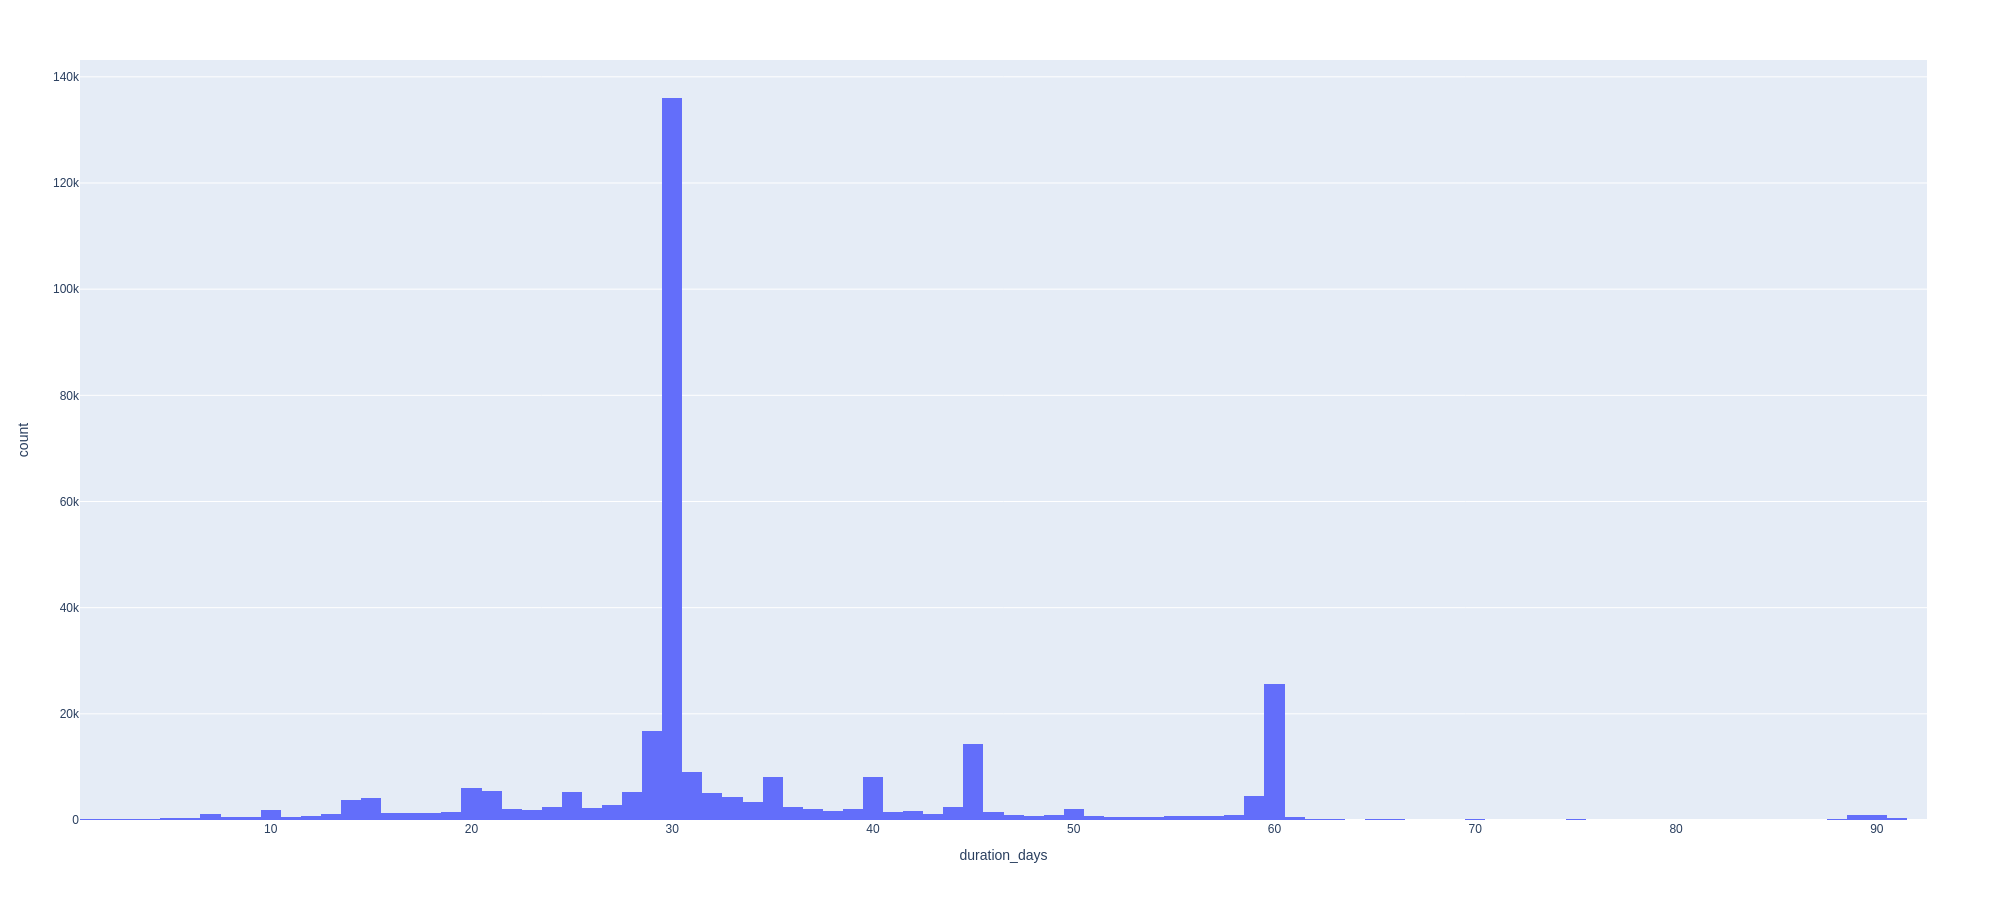

In [268]:
# Write code here
df5 = (
     df_kickstarter
    .query('duration_days <= 100')
)
fig = px.histogram(df5, x = 'duration_days').update_layout(height = 900)
fig.show()

### Show barplot - count of projects per each 'main_category'

* X axis contains 'main_category'
* Y axis contains count of projects (per each 'main_category')

**3 optional bonuses for up +2 points:**
* **+0.5 point**: improve readability of the chart
  * i.e. show only main-categories occuring with high frequency (which have frequency >= 100)
* **+0.5point**: sort bars from highest to lowest count
* **+0.5point**: show counts above each bar
* **+0.5point**: add 3 titles to the chart - main chart + X axis + Y axis

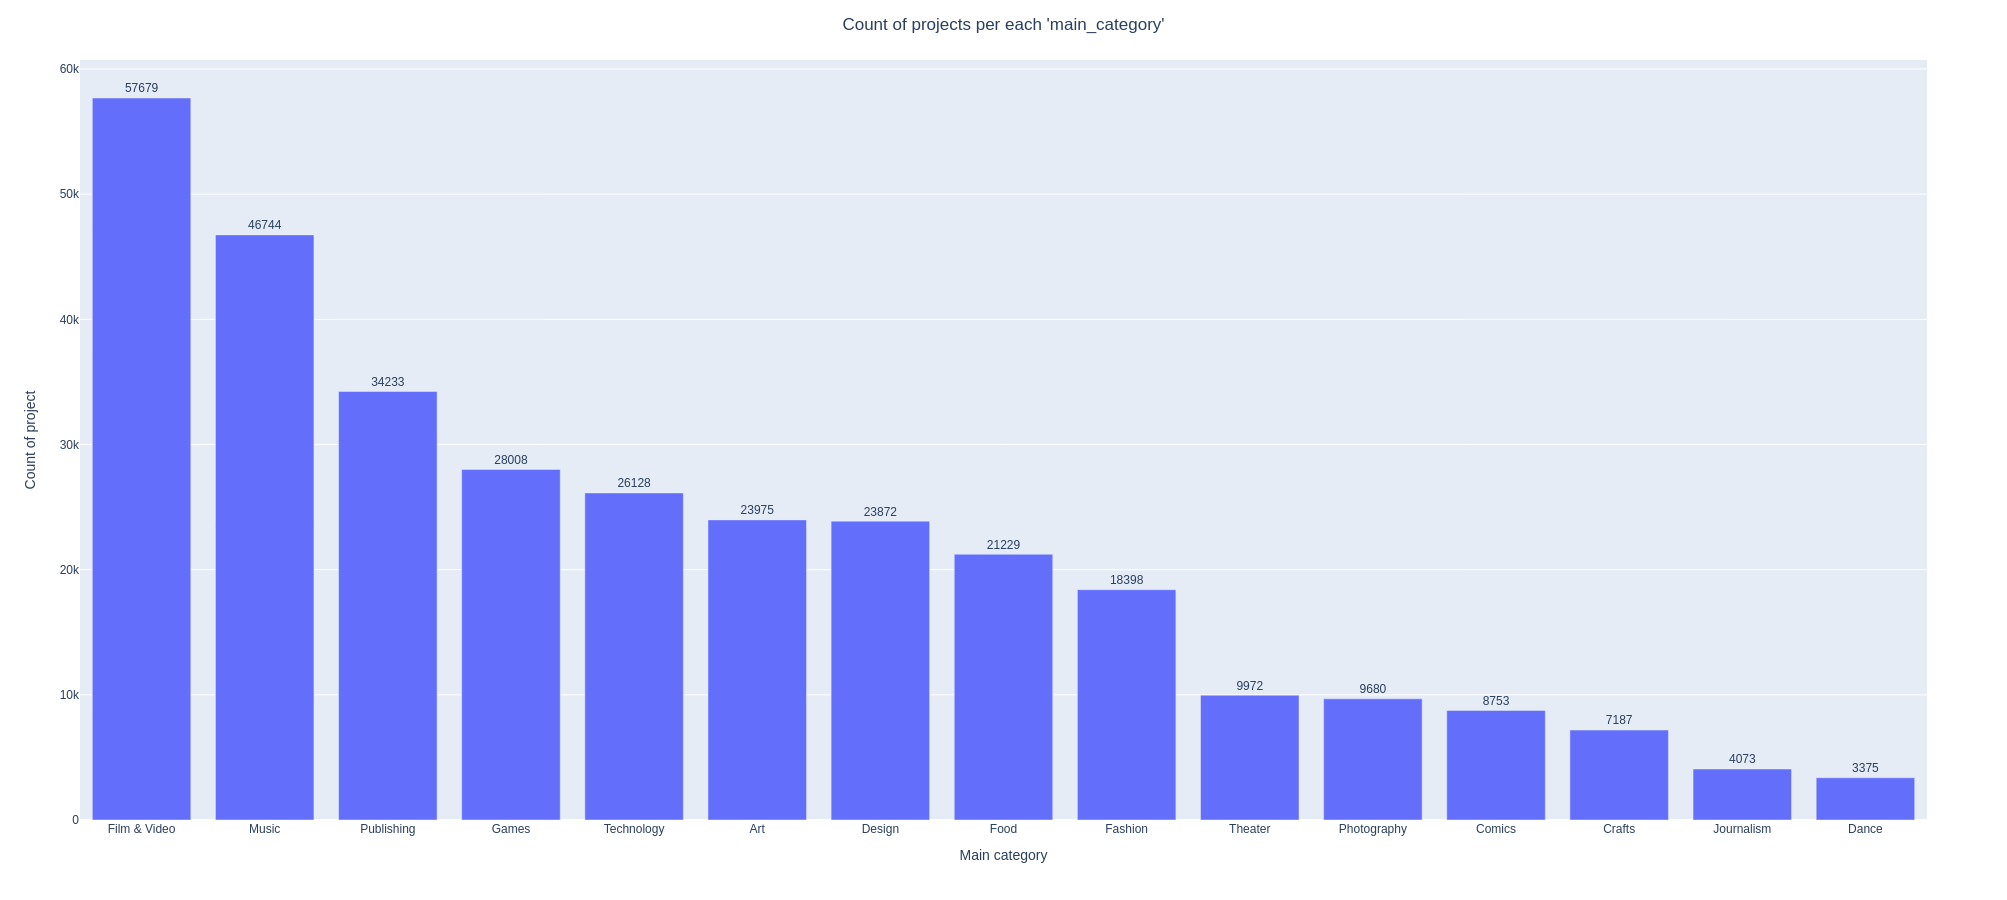

In [263]:
# Write code here
df6 =(
    df_kickstarter
    .pivot_table(index = 'main_category', aggfunc = {'ID':'count'})
    .rename(columns = {'ID': 'count_of_project'})
    .reset_index()
    .query('count_of_project >= 100')
    .sort_values('count_of_project', ascending = False)
) 

fig2 = (
    px.bar(df6, x = 'main_category', y= 'count_of_project', text='count_of_project')
    .update_layout(
        title="Count of projects per each 'main_category'",
        title_x=0.5,
        xaxis_title='Main category',
        yaxis_title='Count of project',
        height = 900
    )
    .update_traces(
        textposition='outside'
    )  
)
fig2.show()

## Bonus question (+1 bonus point)

### Which project `name` is the longest one? 

* We are interested in projects, which have longest value in column `name`
* Possibly, there are more projects with the same maximum count of characters - show them all

In [264]:
df_kickstarter['cout_of_char'] = df_kickstarter['name'].str.len()

In [265]:
max_char = df_kickstarter['cout_of_char'].max()
max_char

96.0

In [266]:
df_kickstarter.query('cout_of_char == @max_char')

ID                                               name  \
20002   1118282973  NYCV - Young Professional Orchestra- Carnegie ...   
39992   1237657936  "Doll's Eye" by Sami S. Chetrit, a political t...   
61268   1364281269  The Beauty from Nowhere Project: A collection ...   
108452  1643783791  Wooden Box - The film - a documentary about Be...   
117927  1700039760  ACID MARSHMALLOW: Improve my Audio & Visual do...   
125896  1747769892  Save your ship - SaveYourShip.com Complimentar...   
134991   180220754  A Little Book About Nothing:How Seinfeld Chang...   
152835  1908331441  Always Something Doing: An Archive of Copyrigh...   
181993   208400996  Templar Crusade Issue #2: a comic book about f...   
186198  2108588456  HELP START UP NFJM 030: A BENEFIT LP fea. NO A...   
211420   326445402  HISTORIC BOOK /TV SERIES VISITING THE VERY BES...   
240981   502572445  Design for Mosaic Sculpture Playground and Mos...   
317136    95999181  American Farmer Catalog: documenting farming t...   
317846   964299684  create the 2010 NEXT TO LAST FESTIVAL and get ...   

       main_category         category            launched            deadline  \
20002          Music  Classical Music 2010-07-02 14:53:50 2010-09-01 18:00:00   
39992     Publishing       Nonfiction 2009-12-22 07:48:54 2010-03-20 21:27:00   
61268    Photography      Photography 2010-04-21 01:03:55 2010-07-19 17:29:00   
108452  Film & Video      Documentary 2009-09-15 02:27:31 2009-12-10 23:12:00   
117927  Film & Video      Documentary 2009-11-26 10:12:11 2009-12-29 05:30:00   
125896    Technology       Technology 2010-06-22 10:10:52 2010-08-15 21:06:00   
134991    Publishing       Nonfiction 2010-09-08 03:12:43 2010-10-08 03:12:43   
152835  Film & Video        Webseries 2010-10-05 02:22:24 2010-11-16 02:22:24   
181993        Comics           Comics 2010-06-13 08:15:14 2010-07-08 11:05:00   
186198         Music            Music 2010-08-04 21:35:53 2010-09-06 23:27:00   
211420    Publishing       Nonfiction 2010-01-06 18:37:28 2010-04-06 18:36:00   
240981           Art        Sculpture 2009-08-10 20:05:40 2009-11-06 21:00:00   
317136   Photography      Photography 2010-05-26 18:43:43 2010-08-24 06:59:00   
317846         Music       Indie Rock 2009-09-02 06:35:43 2009-12-01 05:30:00   

           goal  pledged currency  usd pledged backers     state country  \
20002    2000.0    540.0      USD          NaN      13  canceled      US   
39992   13500.0      0.0      USD          NaN       0  canceled      US   
61268     800.0     30.0      USD          NaN       1  canceled      US   
108452   5000.0      0.0      USD          NaN       0  canceled      US   
117927   1600.0      0.0      USD          NaN       0  canceled      US   
125896  80000.0    370.0      USD          NaN       4  canceled      US   
134991   3000.0      0.0      USD          NaN       0  canceled      US   
152835  13000.0    210.0      USD          NaN       5  canceled      US   
181993   1000.0      0.0      USD          NaN       0  canceled      US   
186198  10000.0    660.0      USD          NaN      25  canceled      US   
211420  16500.0   4700.0      USD          NaN      19  canceled      US   
240981   4800.0    135.0      USD          NaN       5  canceled      US   
317136   5000.0    300.0      USD          NaN       3  canceled      US   
317846   9999.0     37.5      USD          NaN       3  canceled      US   

        duration_days  cout_of_char  
20002            61.0          96.0  
39992            88.0          96.0  
61268            89.0          96.0  
108452           86.0          96.0  
117927           32.0          96.0  
125896           54.0          96.0  
134991           30.0          96.0  
152835           42.0          96.0  
181993           25.0          96.0  
186198           33.0          96.0  
211420           89.0          96.0  
240981           88.0          96.0  
317136           89.0          96.0  
317846           89.0          